In [1]:
import numpy as np
import pandas as pd
import sklearn as sk
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn import metrics

In [2]:
# Load your dataset, replace 'your_dataset.csv' with your actual dataset file
df = pd.read_csv('L0001.csv')

# Assuming your dataset has columns 'x', 'y', 'z', and 'target'
X = df[['x', 'y']]  # Features (x, y, and potentially z)
y = df['MPArea']         # Target values

df.head()

,x,y,P,T,stepIndex,XVector,YVector,MPArea,ImageSize,SKImage-eqDiameter,...,HoughTransform-b,HoughTransform-angle,HoughTransform-fitness,boundary,distanceToBoundary,velocity,XUnitVector,YUnitVector,invVelocity,powerDensity
0,-6.00,16.0,100.0,2.0,7750,0.009,0.0,0,0,0.000000,...,NaN,NaN,NaN,1.0,0.0,0.009,1.0,NaN,111.111111,11111.111111
1,-5.91,16.0,100.0,2.0,7760,0.009,0.0,127,14400,12.716187,...,6.324555,2.574863,41.231056,1.0,0.0,0.009,1.0,NaN,111.111111,11111.111111
2,-5.82,16.0,100.0,2.0,7770,0.009,0.0,174,14400,14.884343,...,6.000000,1.570796,48.000000,1.0,0.0,0.009,1.0,NaN,111.111111,11111.111111
3,-5.73,16.0,100.0,2.0,7780,0.009,0.0,195,14400,15.756958,...,6.324555,2.976444,57.706152,1.0,0.0,0.009,1.0,NaN,111.111111,11111.111111
4,-5.64,16.0,100.0,2.0,7790,0.009,0.0,201,14400,15.997536,...,6.000000,1.570796,60.000000,1.0,0.0,0.009,1.0,NaN,111.111111,11111.111111


In [4]:
df_filtered = df[df['MPArea'] != 0]
df_filtered

,x,y,P,T,stepIndex,XVector,YVector,MPArea,ImageSize,SKImage-eqDiameter,...,HoughTransform-b,HoughTransform-angle,HoughTransform-fitness,boundary,distanceToBoundary,velocity,XUnitVector,YUnitVector,invVelocity,powerDensity
1,-5.91,16.00,100.0,2.0,7760,0.009,0.000,127,14400,12.716187,...,6.324555,2.574863,41.231056,1.0,0.000000,0.009,1.0,NaN,111.111111,11111.111111
2,-5.82,16.00,100.0,2.0,7770,0.009,0.000,174,14400,14.884343,...,6.000000,1.570796,48.000000,1.0,0.000000,0.009,1.0,NaN,111.111111,11111.111111
3,-5.73,16.00,100.0,2.0,7780,0.009,0.000,195,14400,15.756958,...,6.324555,2.976444,57.706152,1.0,0.000000,0.009,1.0,NaN,111.111111,11111.111111
4,-5.64,16.00,100.0,2.0,7790,0.009,0.000,201,14400,15.997536,...,6.000000,1.570796,60.000000,1.0,0.000000,0.009,1.0,NaN,111.111111,11111.111111
5,-5.55,16.00,100.0,2.0,7800,0.009,0.000,157,14400,14.138550,...,5.291503,1.756144,43.069711,1.0,0.000000,0.009,1.0,NaN,111.111111,11111.111111
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23679,6.10,-15.64,195.0,2.0,385153,0.000,-0.008,463,14400,24.279825,...,8.944272,3.079174,143.387587,0.0,0.100000,0.008,NaN,-1.0,125.000000,24375.000000
23680,6.10,-15.72,195.0,2.0,385163,0.000,-0.008,449,14400,23.909926,...,5.656854,2.903757,96.041658,0.0,0.100520,0.008,NaN,-1.0,125.000000,24375.000000
23681,6.10,-15.80,195.0,2.0,385173,0.000,-0.008,480,14400,24.721549,...,8.485281,1.603043,131.590273,0.0,0.102009,0.008,NaN,-1.0,125.000000,24375.000000
23682,6.10,-15.88,195.0,2.0,385183,0.000,-0.008,499,14400,25.206081,...,6.633250,2.926235,108.641613,0.0,0.104424,0.008,NaN,-1.0,125.000000,24375.000000


[[  4.38126038 394.07994186]
 [  2.85230642 324.07577434]
 [  4.18979348 189.5048913 ]
 [  7.45802951 469.8812934 ]]


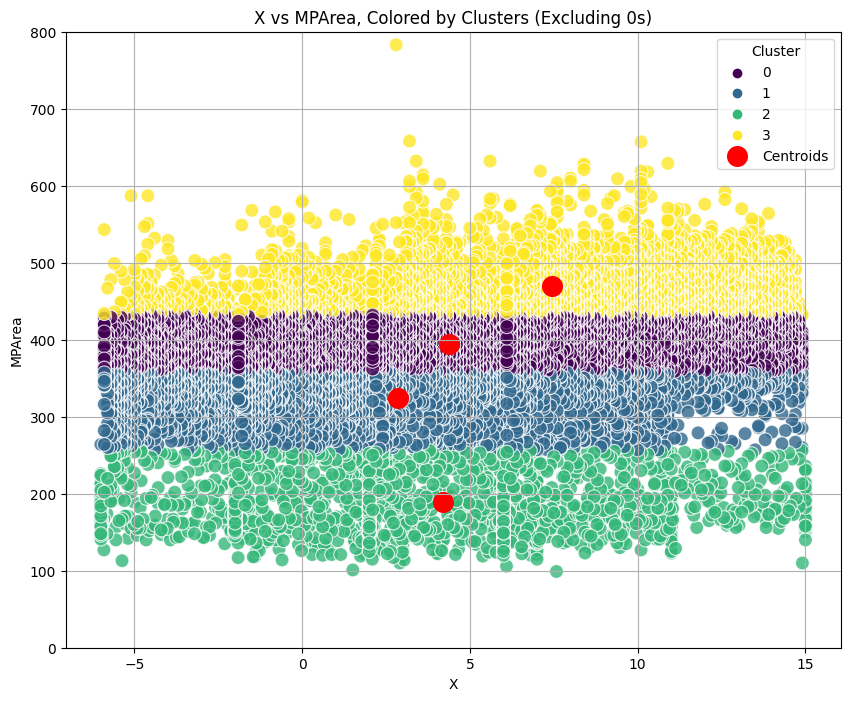

In [5]:
#GRAPHING WITHOUT 0'S IN THE MELT POOL AREA (BLANK IMAGES)



X3 = df_filtered[['x','MPArea']].values

kmeans3 = KMeans(n_clusters=4, random_state=0)
kmeans3.fit(X3)
centroids3 = kmeans3.cluster_centers_
predicted_clusters3=kmeans3.labels_
print(centroids3)


# Scatter plot of 'z' vs 'x', color-coded by clusters
plt.figure(figsize=(10, 8))
sns.scatterplot(x='x', y='MPArea',  hue=predicted_clusters3[:len(df_filtered)], data=df_filtered, palette='viridis', s=100, alpha=0.8)
plt.xlabel('X')
plt.ylabel('MPArea')
plt.scatter(centroids3[:, 0], centroids3[:, 1], marker='o', color='red', s=200, label='Centroids')
plt.xlabel('X')
plt.title('X vs MPArea, Colored by Clusters (Excluding 0s)')
plt.grid(True)
plt.ylim(0,800)
plt.legend(title='Cluster')
plt.show()

In [1]:
#SCATTER PLOTS NO 0'S

X4 = df_filtered[['y','MPArea']].values

kmeans4 = KMeans(n_clusters=4, random_state=0)
kmeans4.fit(X4)
centroids4 = kmeans4.cluster_centers_
predicted_clusters4=kmeans4.labels_
print(centroids4)

plt.figure(figsize=(10, 8))
sns.scatterplot(x='y', y='MPArea',  hue=predicted_clusters4[:len(df_filtered)], data=df_filtered, palette='viridis', s=100, alpha=0.8)
plt.xlabel('Y')
plt.ylabel('MPArea')
plt.scatter(centroids4[:, 0], centroids4[:, 1], marker='o', color='red', s=200, label='Centroids')
plt.title('Y vs MPArea, Colored by Clusters (Excluding 0s)')
plt.grid(True)
plt.ylim(0,800)
plt.legend(title='Cluster')
plt.show()

NameError: name 'df_filtered' is not defined